In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.misc as misc



In [12]:
N = 100
tmax = 10
D = 1
def potential(x):
    return x ** 4 / 4 - x ** 2 / 2

def dpotential(x):
    return x ** 3 - x

def action(init_values, q0, qf):
        """function to calculate the stochastic action using the Ito formalism

        Args:
            dt (float): time step width
            q (np.ndarray): position
            k1 (np.ndarray): conjugate variable to q

        Returns:
            float: (discrete) MSR action of system
        """
        q = init_values[:N]
        #k1 = init_values[N:]
        
        q[0] = q0
        q[-1] = qf
        
        dt = tmax / N

        # dimension
        m = len(q) - 1

        # derivatives
        qdot = np.zeros(m)

        qdot[:] = (q[1:] - q[:-1]) / dt

        # action
        S = 0
        
        for i in range(m):
            S += (qdot[i] + dpotential(q[i])) ** 2 / 2
        # (
        #     D**(-1) * np.dot(qdot + misc.derivative(potential, q[:-1]), qdot + misc.derivative(potential, q[:-1]))
        #     #- lambda_ * np.dot(np.ones(m), phi(k1[:-1] * a))
        # )

        # return the action
        return S * dt

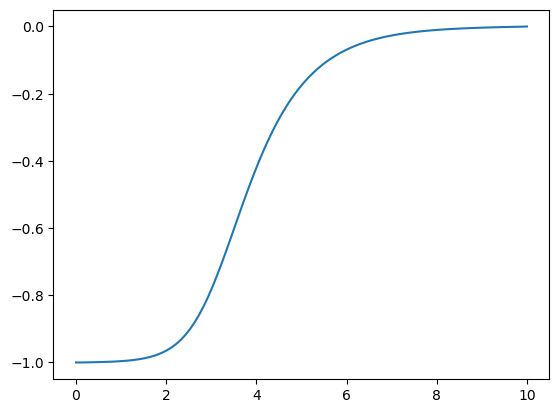

In [16]:

q0 = -1
qf = 0
system = np.linspace(q0, qf, N)
optimum = opt.minimize(action, x0=system, args=(q0, qf))#, constraints=constraint, options={'disp': True})


time = np.linspace(0, tmax, N)
q = np.zeros(N)
q[0] = -1
q[-1] = 0
q[1:-1] = optimum.x[:N-2]


plt.plot(time, q)

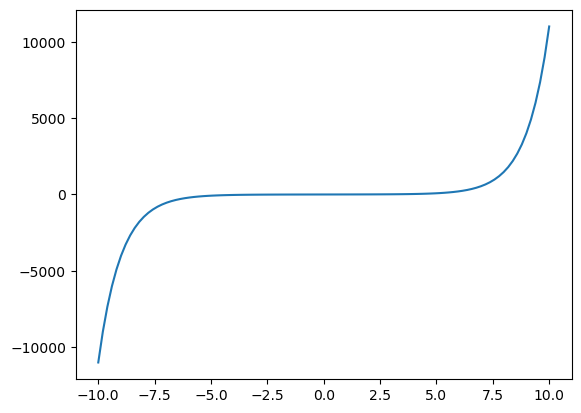

In [8]:
o = 10
k = np.linspace(-o, o, 100)

plt.plot(k, np.sinh(k) + k)
#plt.yscale("log")



In [9]:
print(np.sinh(100))

1.3440585709080678e+43


[0.24995488 0.24994876 0.24996693 0.25007372 0.25040768 0.25150036
 0.25454393 0.26215753 0.27897037 0.31244737]


(0.01, 1.0, -1.0, 1.0)

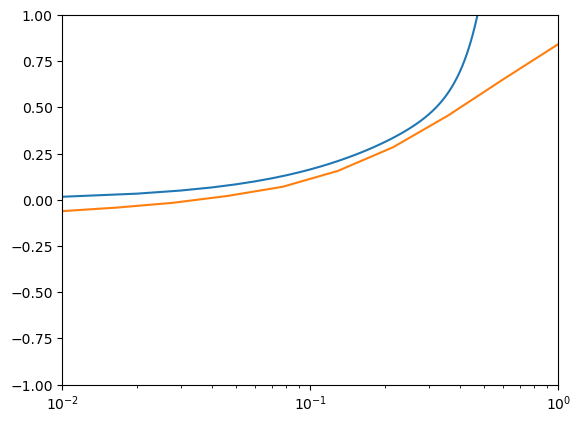

In [5]:
import numpy as np
import matplotlib.pyplot as plt

AP_pred = 1/4

f = np.genfromtxt("act_tau.txt")
tau = f[0, :]

S5 = f[1, :]
def g(t):
    dV = 1/4
    return dV* ( 1  + 0.5 * t**2 - 6/5 * t**4 + 279/35 * t**6)

t = np.linspace(1e-2, 1, 100)
#plt.plot(tau, S3)
#plt.plot(tau, S4)
S5 = np.array(S5)
plt.plot(t, (g(t)- AP_pred)/(8/27 * t * AP_pred))
plt.plot(tau, (S5 - AP_pred)/(8/27 * tau * AP_pred))
plt.xscale("log")
#plt.yscale("log")

print(S5)
plt.axis([1e-2, 1e0, -1, 1])

(0.01, 1.0, 0.249, 0.26)

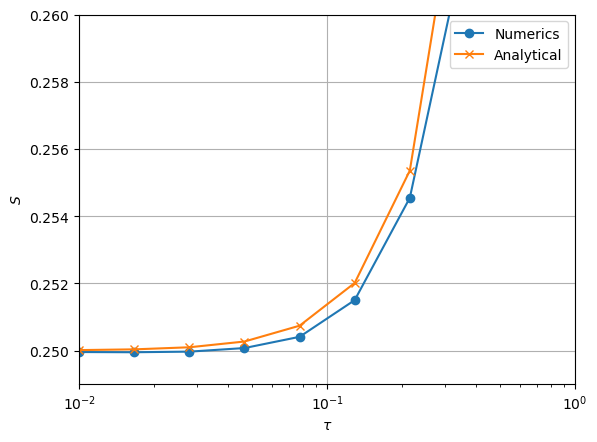

In [14]:
plt.plot(tau, S5, "-o",label="Numerics")
plt.plot(tau, g(tau), "-x", label="Analytical")
plt.xscale("log")
plt.grid()
plt.xlabel(r"$\tau$")
plt.ylabel(r"$S$")
plt.legend()
plt.axis([1e-2, 1e0, 0.249, 0.26])

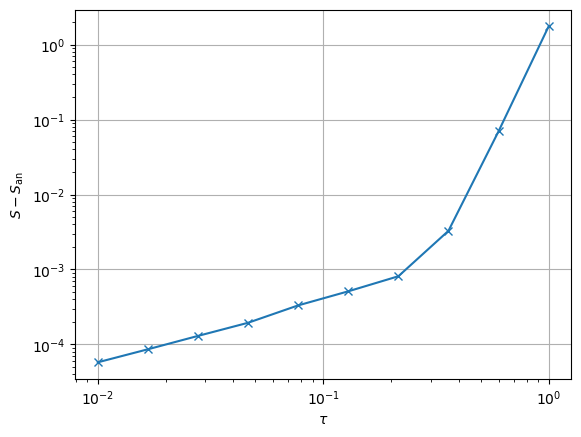

In [9]:
plt.plot(tau, g(tau)-S5, "-x")
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.xlabel(r"$\tau$")
plt.ylabel(r"$S-S_\mathrm{an}$")
plt.show()

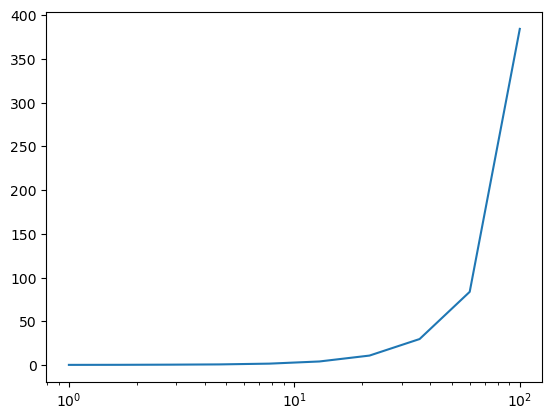

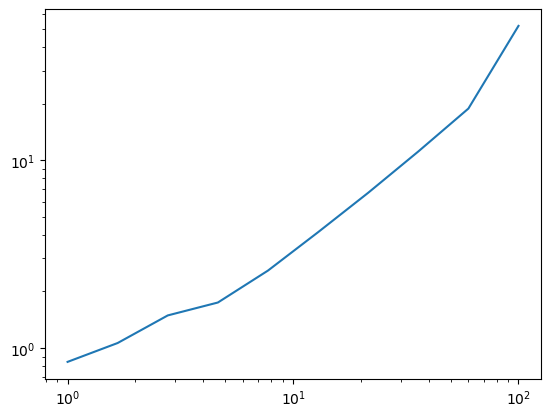

In [13]:
import numpy as np
import matplotlib.pyplot as plt

AP_pred = 1/4

f = np.genfromtxt("act_tau_high.txt")
tau = f[0, :]

S5 = f[1, :]
def g(t):
    dV = 1/4
    return dV* ( 1  + 0.5 * t**2 - 6/5 * t**4 + 279/35 * t**6)

f = plt.figure()
plt.plot(tau, S5)
plt.xscale("log")
plt.show()


ff = plt.figure()
plt.plot(tau, (S5-0.25)/(2/27*tau))
plt.xscale("log")
plt.yscale("log")

plt.show()


/tmp/ipykernel_9080/1762240009.py:12: RuntimeWarning: overflow encountered in sinh
  return np.sinh(x)
/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


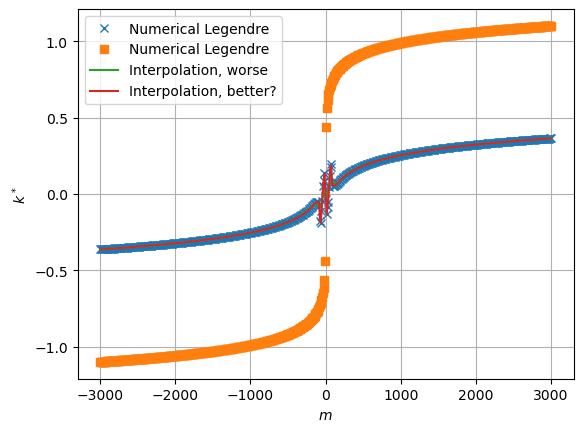

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import UnivariateSpline, interp1d

m = np.linspace(-3000, 3000, 600)
initial = np.ones_like(m) * (1e-5)


def Leg(m, initial, a, lambda_, D2):
    def dphi(x):
        return np.sinh(x)

    def Eq(k, m, a, lambda_, D2):
        return m - D2 * k - lambda_ * a * dphi(a * k)
    def Eq2(k, m, a, lambda_, D2):
        return  k * m- D2/2 * k**2 - lambda_ * (np.cosh(a*k) - 1)
        
    k = opt.fsolve(Eq, initial, args=(m, a, lambda_, D2), full_output=0, maxfev=500000)

    s = []
    for i in range(len(k)):
        s.append(Eq2(k[i], m[i], a, lambda_, D2))
    
    return k, s

b = Leg(m, initial, 10, 0.01, 2)
brr = b[0]


a = Leg(m, brr, 100, 0.01, 2)
arr = a[0]
spl = UnivariateSpline(m, arr)
xs = np.linspace(m.min(), m.max(), 1000)
spl.set_smoothing_factor(0.1)

arr_int = interp1d(m, arr, kind="linear")



plt.plot(m, arr, "x", label="Numerical Legendre")
plt.plot(m, brr, "s", label="Numerical Legendre")

plt.plot(xs, spl(xs), label="Interpolation, worse")
plt.plot(xs, arr_int(xs), label="Interpolation, better?")
plt.legend()
plt.grid()
plt.xlabel(r"$m$")
plt.ylabel(r"$k^*$")
plt.savefig("Legendre_interpolation.pdf", dpi=500)


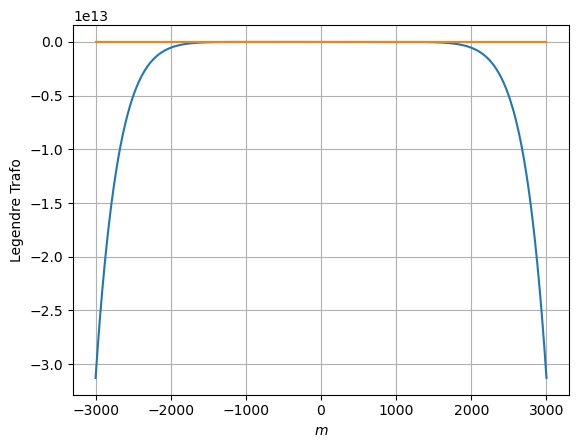

In [42]:
plt.plot(m, a[1])
plt.plot(m, b[1])

plt.xlabel(r"$m$")
plt.ylabel(r"Legendre Trafo")
plt.grid()

[-0.63536517 -0.62794679 -0.61993847 -0.61123865 -0.60171726 -0.59120371
 -0.57946844 -0.56619205 -0.55091176 -0.53292065 -0.51106044 -0.48323548
 -0.44503681 -0.3844045  -0.24103622  0.24103635  0.38440474  0.44503684
  0.4832355   0.51106045  0.53292066  0.55091175  0.56619203  0.57946844
  0.59120369  0.60171724  0.61123864  0.61993845  0.62794678  0.63536517]


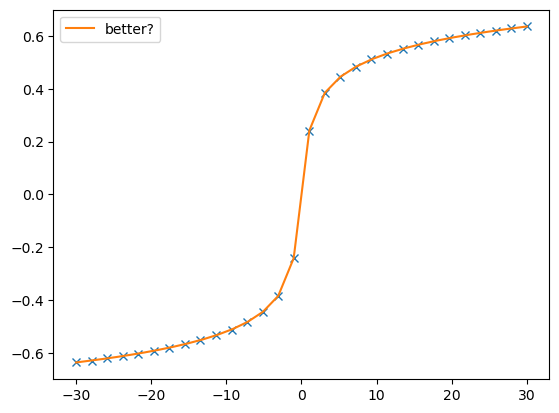

In [65]:
from sympy import cos, nsolve, Symbol
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import UnivariateSpline, interp1d

m = np.linspace(-30, 30, 30)
initial = np.ones_like(m) * (-1e-5)


def Leg(m, initial, a, lambda_, D2):
    def dphi(x):
        return np.sinh(x)
    def Eq2(k, m, a, lambda_, D2):
        s = 0
        for i in range(len(m)):
            s+= k[i]*m[i]- D2/2 * k[i]**2 - lambda_ * (np.cosh(a*k[i]) - 1)
        return -s
    def Eq(k, m, a, lambda_, D2):
        return m - D2 * k - lambda_ * a * dphi(a * k)

    sol = opt.minimize(Eq2, initial, args=(m, a, lambda_, D2))    
    
    return sol.x

g = Leg(m, initial, 10, 0.01, 2)
arr = g
print(arr)
#spl = UnivariateSpline(m, arr)
xs = np.linspace(m.min(), m.max(), 1000)
#spl.set_smoothing_factor(0.1)

arr_int = interp1d(m, arr, kind="linear")



plt.plot(m, arr, "x")
#plt.plot(xs, spl(xs), label="worse?")
plt.plot(xs, arr_int(xs), label="better?")
plt.legend()
plt.show()

In [ ]:
k = np.linspace(-10, 10, 100)
plt.plot(k, 0.5 * k**2 - 0.01 * )

In [4]:
s = "blablablablub"

for i in range(10):
    b = "%d" % 400
    d = s+b+s
    print(d)
    #plt.plot()
    #plt.savefig("bla_fi_%d.pdf" % i)

blablablablub400blablablablub
blablablablub400blablablablub
blablablablub400blablablablub
blablablablub400blablablablub
blablablablub400blablablablub
blablablablub400blablablablub
blablablablub400blablablablub
blablablablub400blablablablub
blablablablub400blablablablub
blablablablub400blablablablub
